In [1]:
from tkinter import *
from tkinter import messagebox
import tkinter.scrolledtext as scrolledtext
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import EllipseSelector
from functools import partial

In [2]:
#Calculo de variable electromagnetica "ns"
def variable_electromagnetica(frec, polos):
    ns=(120*frec)/polos
    return ns

In [3]:
def velocidad_rotor(ns,s):
    nr=[];
    if(s!=[]):
        for x in s:
            nr.append(ns*(1-x))
        return nr

In [4]:
def deslizamiento(nr,ns):
    return (ns-nr)/ns

In [5]:
def axis_desplazamiento(nr,ns):
    s=[];
    if(nr!=[]):
        for x in nr:
            s.append(deslizamiento(x,ns))
        return s

In [6]:
def torque(voltaje,deslizamiento_list, frecuencia):
    t=[];
    for x in deslizamiento_list:
        temp=(((voltaje**2)/3)*x)/frecuencia
        t.append(temp)
    return t

In [7]:
def fill_nr(inicial,final):
    if(inicial<final):
        if(inicial!=0):
            nr=[]
            for i in range (inicial,final):
                nr.append(i)
            return nr
    else:
        return []

In [8]:
def plotear_aux_des(nrIn,nrFin,voltaje,frecuencia,polos):
    nr=fill_nr(nrIn,nrFin)
    ns=variable_electromagnetica(frecuencia, polos)
    s=axis_desplazamiento(nr,ns)
    tor=torque(voltaje,s,frecuencia)
    plt.plot(s, tor, label='Torque vs Deslizamiento')
    
    plt.legend()
    plt.show()

In [9]:
def plotear_deslizamiento (nr_in,nr_fin,volt,frec,numPol):
    polos=int(numPol.get())
    frecuencia=int(frec.get())
    nrInicial=int(nr_in.get())
    nrFinal=int(nr_fin.get())
    voltaje=int(volt.get())
    if(polos>0 and frecuencia>0 and nrInicial>0 
       and nrFinal>0 and voltaje>0 and nrInicial<nrFinal):
    #and nrFinal<variable_electromagnetica(frecuencia, polos)):
        plotear_aux_des(nrInicial,nrFinal,voltaje,frecuencia,polos)
        

In [10]:
def plotear_aux_vel(voltaje,frecuencia,polos):
    s=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    ns=variable_electromagnetica(frecuencia, polos)
    nr=velocidad_rotor(ns,s)
    tor=torque(voltaje,s,frecuencia)
    plt.plot(nr,tor, label='Torque vs Velocidad del Rotor')
    plt.legend()
    plt.show()

In [11]:
def plotear_velocidad(p,f,volt):    
    polos=int(p.get())
    frecuencia=int(f.get())
    voltaje=int(volt.get())
    if(polos>0 and frecuencia>0 and voltaje>0):
        plotear_aux_vel(voltaje,frecuencia,polos)
        #reset()"""

In [12]:
def reset():
    nrin.delete(0, END)
    nrfin.delete(0, END)
    varElec.delete(0, END)
    numPol.delete(0, END)
    frec.delete(0, END)

In [13]:
def desplazamiento_w():
    ventana.withdraw()
    despWindow = Toplevel()
    despWindow.title("Torque vs Desplazamiento")
    despWindow.minsize(600,400)
    despWindow.resizable(width=NO,height=NO)
    cH = Canvas(despWindow, width= 600, height = 400, bg ="#d3d00e")
    cH.place(x=0,y=0)
    #*******************Ir a ventana HOME*********************
    def home():
        despWindow.destroy()
        ventana.deiconify()##Reaparece la ventana principal

    botonHome = Button(despWindow, text="Home", command=home,bg="#BF1134",fg="white",font=("Helvetica",15))
    botonHome.place(x=15,y=15)
    
        #**********************Interfaz************************
    #labels
    par =  Label(despWindow,text="Parametros del Motor:",font=("Helvetica",18),fg="black",bg="#d3d00e").place(x=300,y=20)
    ini =  Label(despWindow,text="Nr inicial",font=("Helvetica",14),fg="black",bg="#d3d00e").place(x=40,y=140)
    fin =  Label(despWindow,text="Nr final",font=("Helvetica",14),fg="black",bg="#d3d00e").place(x=40,y=200)
    voltaje = Label(despWindow,text="Voltaje",font=("Helvetica",14),fg="black",bg="#d3d00e").place(x=300,y=80)
    numeroPolos = Label(despWindow,text="Numero de polos (P)",font=("Helvetica",14),fg="black",bg="#d3d00e").place(x=300,y=180)
    frecuencia = Label(despWindow,text="Frecuencia (Fs)",font=("Helvetica",14),fg="black",bg="#d3d00e").place(x=300,y=280)

    #TextInput
    nr_in = Entry(despWindow)
    nr_in.place(x=40,y=170)
    nr_in.focus_set()
    nr_fin = Entry(despWindow)
    nr_fin.place(x=40,y=230)
    nr_fin.focus_set()
    volt = Entry(despWindow)
    volt.place(x=300,y=120)
    volt.focus_set()
    numPol = Entry(despWindow)
    numPol.place(x=300,y=220)
    numPol.focus_set()
    frec = Entry(despWindow)
    frec.place(x=300,y=320)
    frec.focus_set()

    #Buttons
    botonStart = Button(despWindow, text="Graficar", command=partial(plotear_deslizamiento, nr_in,nr_fin,volt,frec,numPol), bg="#a9052e",fg="white",font=("Helvetica",15)).place(x=40, y=290)


In [14]:
def velocidad_w():
    ventana.withdraw()
    velWindow = Toplevel()
    velWindow.title("Torque vs Velocidad rotor")
    velWindow.minsize(600,400)
    velWindow.resizable(width=NO,height=NO)
    cH = Canvas(velWindow, width= 600, height = 400, bg ="white")
    cH.place(x=0,y=0)
    #*******************Ir a ventana HOME*********************
    def home():
        velWindow.destroy()
        ventana.deiconify()##Reaparece la ventana principal

    botonHome = Button(velWindow, text="Home", command=home,bg="white",fg="black",font=("Helvetica",15))
    botonHome.place(x=15,y=15)
    
    #**********************Interfaz************************
    #labels
    par =  Label(velWindow,text="Parametros del Motor:",font=("Helvetica",18),bg="white",fg="black").place(x=300,y=20)
    voltaje = Label(velWindow,text="Voltaje",font=("Helvetica",14),bg="white",fg="black").place(x=300,y=80)
    numeroPolos = Label(velWindow,text="Numero de polos (P)",font=("Helvetica",14),bg="white",fg="black").place(x=300,y=180)
    frecuencia = Label(velWindow,text="Frecuencia (Fs)",font=("Helvetica",14),bg="white",fg="black").place(x=300,y=280)

    #TextInput
    volta = Entry(velWindow)
    volta.place(x=300,y=120)
    volta.focus_set()
    numPolos = Entry(velWindow)
    numPolos.place(x=300,y=220)
    numPolos.focus_set()
    frecuencia = Entry(velWindow)
    frecuencia.place(x=300,y=320)
    frecuencia.focus_set()

    #Buttons
    botonStart = Button(velWindow, text="Graficar", command=partial(plotear_velocidad, numPolos,frecuencia,volta), bg="#a9052e",fg="white",font=("Helvetica",15)).place(x=40, y=290)

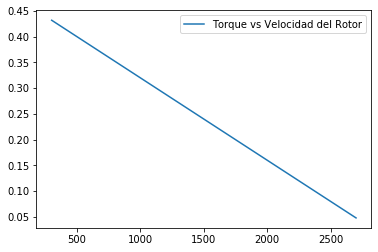

In [ ]:
ventana = Tk()
ventana.title("Tarea3")
ventana.minsize(600,400)
ventana.resizable(width=NO, height=NO)
ventana.configure(background="white")
fondo= Canvas(ventana, width= 600, height = 400, bg="black")
fondo.place(x=0,y=0)
#*************************BOTONES*****************************
etiqueta = Label(ventana,text="Motor de Inducción",font=("Comic Sans Ms",30),bg="black",fg="white").place(x=100,y=20)
instrucciones = Label(ventana,text="Seleccione caso 1 para gráfica desplazamiento vs torque\nSeleccione caso 2 para gráfica velocidad del rotor vs torque",font=("Comic Sans Ms",12),bg="black",fg="white").place(x=100,y=100)
botonDesp = Button(ventana, text="Caso 1", command=desplazamiento_w,bg="#a9052e",fg="white",font=("Helvetica",15))
botonDesp.place(x=220,y=300)
botonVel = Button(ventana, text="Caso 2", command=velocidad_w,bg="#d3d00e",fg="white",font=("Helvetica",15))
botonVel.place(x=320,y=300)
ventana.mainloop()